<a href="https://colab.research.google.com/github/Shubhranshu-Malhotra/Naruto_Characters_Classification/blob/main/Naruto_Character_Classification_Pilot_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![picture](https://drive.google.com/uc?id=1AGYYPdjAUaNdRUltsIoSJhUEVdL5VLwR)

# Naruto Characters Classification Pilot Project 2

**This is the second test project to learn and gather all the pieces/ skills required to complete the full project.**

*The **Naruto Characters Classification Project** is a multi class classification project.  
The total number of classes for the project are not yet known.*  

This pilot project is aimed to check the viability of the complete project and to acquire the skills required for the completion of the full project.  

We are going to take a different workflow than the one we took in the previous pilot project.
For this project we follow the workflow shown in the **Machine Learning and Data Science course by Zero to Mastery (by Andrei and Daniel)**.

This Pilot Project is being made using **3 classes**:
1.   Naruto_Uzumaki
2.   Sakura_Haruno
3.   Sasuke_Uchiha

**Note:**  
Data is divided into two parts (train and validation). We skipped the test part as this is a pilot project and also because we don't have much data in each class to begin with (around 58 images per class).  

If we succeed in getting good results here. We can make another split, run the program again and test on test data.

## Concerns from previous pilot project
#### Concern 1 : There are multiple similar images in each class these need to be filtered out in order to avoid a bias.
##### Solution : Done for Naruto, Sakura and Sasuke images.  
  

#### Concern 2 : There is a need to manually edit the images in order to remove the labels or unrelated information on the image.
##### Solution : Done for Naruto, Sakura and Sasuke images.  
    

#### Concern 3 : There is a need to create labels of the images and save them as a separate labels file.  
##### Solution : Task 6 (Previous pilot project)


#### Concern 4 : There is a need to convert the 4 channel PNG images to 3 channel images [RBGA to RBG]. 
##### Solution : Task 3 (Previous pilot project)  
**This is not necessary if making own CNN because CNN can take any size input but if using transfer learning 3 channels might be required since most of the premade models only accept a 3 channel input**  


#### Concern 5 : There is a need to standardize the shape (i.e. the image width and height) of all the images.



##1) Problem
*The **Naruto_Character_Classification_Pilot_2** is a multi class classification project.*  
The goal of this project is to classify the images of Naruto characters into the following **three classes**:
1.   Naruto_Uzumaki
2.   Sakura_Haruno
3.   Sasuke_Uchiha

##2) Data
The data we are using for this project is self assembled from various websites.
The complete data havs many more classes but we are using a part of the whole data for this pilot project.  
We use data of 3 main characters Naruto, Sakura and Sasuke.  
In this project we divide data into only two parts (train and validation).


##3) Evaluation
Intially the aim will be an accuracy of 90%.  
Note: The evaluation metrics will change as the project progresses.

##4) Features

*   We are dealing with image data so, we will be using Deep Learning for classification
*   Our data for this project consists of a total of **176 images**
*   Our data consists of three classes of images:
    1.   Naruto_Uzumaki
    2.   Sakura_Haruno
    3.   Sasuke_Uchiha
*   The images are in RBGA or RBG format. We will need to convert them to either one on basis of our needs.
*   The images are of different sizes. We need to resize them.  

**CAUTION: IN THE DATASET CURRENTLY IN USE THERE IS ONLY ONE RGB (3 CHANNEL) IMAGE (Naruto_Uzumaki (34).png). ALL OTHER IMAGES ARE RGBA (4 CHANNEL IMAGES)**

*Let*'s Go!!

<!-- ![picture](https://drive.google.com/uc?id=1Dbt7q3fwL183bERFfh4gIIdsOLfpldeF)  -->
<center><img src = 'https://drive.google.com/uc?id=1Dbt7q3fwL183bERFfh4gIIdsOLfpldeF'></center>


## Getting Data Ready
The data is present in the Google Drive in Pilot_selected_all_in_one folder.  
The folder contains all 176 images belonging to 3 classes.  
The labels file is also present in the google drive as selected_labels.csv.  



We need to convert our images into tensors before feeding them to models. But before that lets explore our data a little.

In [277]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import tensorflow_hub as hub

In [150]:
labels_csv = pd.read_csv("/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/selected_labels.csv")

In [151]:
labels_csv.shape

(176, 2)

In [152]:
labels_csv.head()

,image_name,character_label
0,Sasuke_Uchiha (20).png,Sasuke_Uchiha
1,Sakura_Haruno (32).png,Sakura_Haruno
2,Sakura_Haruno (15).png,Sakura_Haruno
3,Sakura_Haruno (28).png,Sakura_Haruno
4,Naruto_Uzumaki (41).png,Naruto_Uzumaki


In [153]:
labels_csv['character_label'].value_counts()

Naruto_Uzumaki    61
Sasuke_Uchiha     58
Sakura_Haruno     57
Name: character_label, dtype: int64

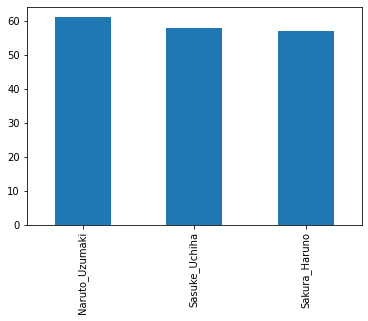

In [154]:
labels_csv['character_label'].value_counts().plot(kind='bar')

In [155]:
labels_csv['character_label'].value_counts().median()

58.0

In [156]:
# Plot meadian on the bar graph above


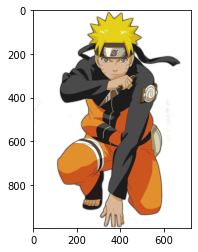

In [157]:
plt.imshow(plt.imread('/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_selected_all_in_one/Naruto_Uzumaki (41).png'))

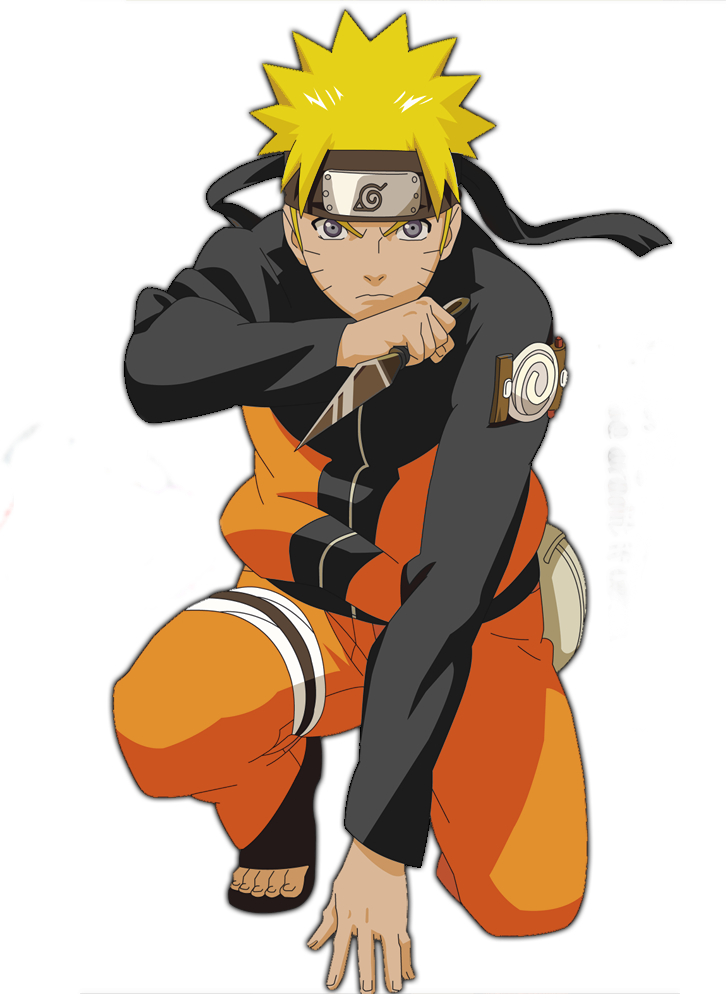

In [158]:
from IPython.display import Image
Image('/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_selected_all_in_one/Naruto_Uzumaki (41).png')

### Getting images and their pathnames
We will first create the pathnames from image Ids.


In [159]:
filepaths = ["/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_selected_all_in_one/" + fname for fname in labels_csv['image_name']]

In [160]:
filepaths[:5]

['/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_selected_all_in_one/Sasuke_Uchiha (20).png',
 '/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_selected_all_in_one/Sakura_Haruno (32).png',
 '/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_selected_all_in_one/Sakura_Haruno (15).png',
 '/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_selected_all_in_one/Sakura_Haruno (28).png',
 '/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_selected_all_in_one/Naruto_Uzumaki (41).png']

In [161]:
# Check whether the number of filenames matches the number of image files
print('Number of filenames:', len(filepaths))
print('Number of image files:',len(os.listdir('/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_selected_all_in_one')))

Number of filenames: 176
Number of image files: 176


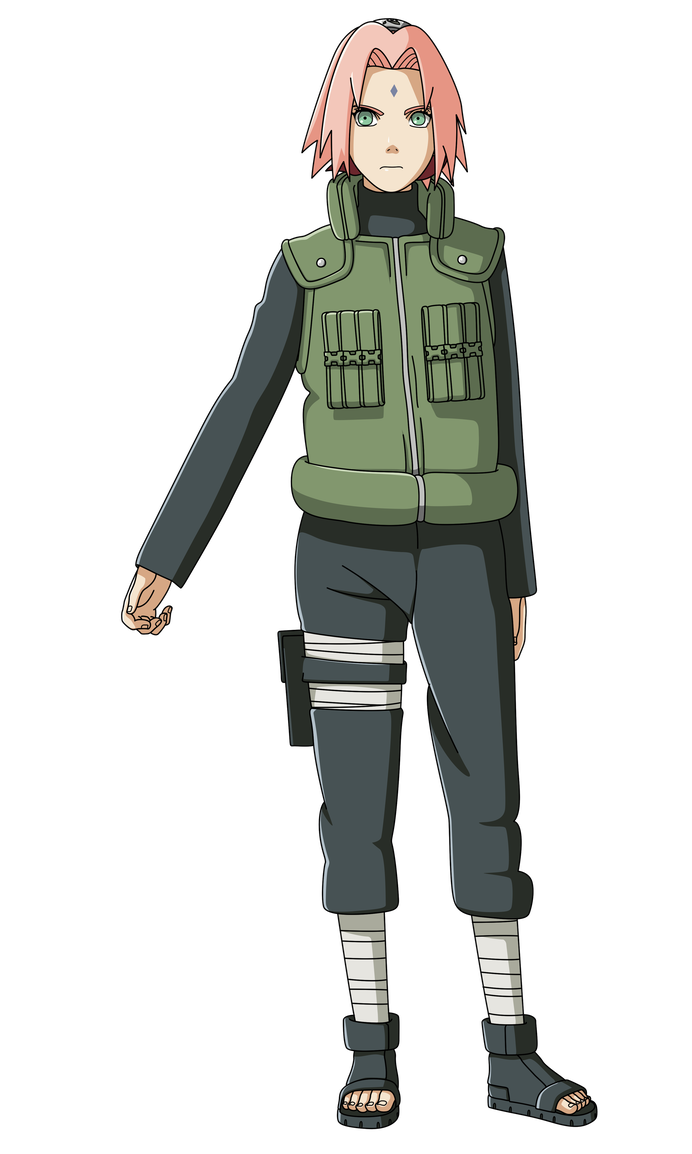

In [162]:
# Check for if the filenames have been correctly formatted or not
Image(filepaths[2])

Now that we have our filepaths let's prepare our labels.

In [163]:
labels = labels_csv['character_label']

In [164]:
labels[:5]

0     Sasuke_Uchiha
1     Sakura_Haruno
2     Sakura_Haruno
3     Sakura_Haruno
4    Naruto_Uzumaki
Name: character_label, dtype: object

Right now the labels are of Series type.We need to convert them to numpy array to work on them.


In [165]:
type(labels)

pandas.core.series.Series

In [166]:
labels = np.asarray(labels)
labels[:5]

array(['Sasuke_Uchiha', 'Sakura_Haruno', 'Sakura_Haruno', 'Sakura_Haruno',
       'Naruto_Uzumaki'], dtype=object)

In [167]:
# Converted labels from Series to numpy array
type(labels)

numpy.ndarray

In [168]:
# See if number of labels matches the number of filenames

if len(filepaths) == len(labels):
  print('Number of labels matches the number of filenames!!', len(filepaths))
else:
  print('Warning: number of labels DONOT match the number of filenames')
  print('Filenames: ', len(filepaths))
  print('Labels: ', len(labels))

Number of labels matches the number of filenames!! 176


### The next step is to convert the labels to numbers

We begin by finding the number of unique labels i.e. the number of classes.

In [169]:
unique_characters = np.unique(labels)
unique_characters, len(unique_characters)

(array(['Naruto_Uzumaki', 'Sakura_Haruno', 'Sasuke_Uchiha'], dtype=object), 3)

In [170]:
# Convert a single number to booleans
labels[0] == unique_characters

array([False, False,  True])

In [171]:
# Convert all the labels to booleans
boolean_labels = [label == unique_characters for label in labels]

In [172]:
boolean_labels[:5]

[array([False, False,  True]),
 array([False,  True, False]),
 array([False,  True, False]),
 array([False,  True, False]),
 array([ True, False, False])]

In [173]:
len(boolean_labels)

176

In [174]:
# Example turning boolean array to integers
print(labels[0])
print(np.where(labels[0]==unique_characters))

print(boolean_labels[0].argmax())
print(boolean_labels[0].astype('int'))


Sasuke_Uchiha
(array([2]),)
2
[0 0 1]


In [175]:
print(labels[0])
print(boolean_labels[0].astype('int'))


Sasuke_Uchiha
[0 0 1]


### Create a train and validation split

In [180]:
# Copying image filepaths to X
X = filepaths.copy()
X[:5]

['/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_selected_all_in_one/Sasuke_Uchiha (20).png',
 '/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_selected_all_in_one/Sakura_Haruno (32).png',
 '/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_selected_all_in_one/Sakura_Haruno (15).png',
 '/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_selected_all_in_one/Sakura_Haruno (28).png',
 '/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_selected_all_in_one/Naruto_Uzumaki (41).png']

In [182]:
# Copying labels to y
y = boolean_labels.copy()
y[:5]

[array([False, False,  True]),
 array([False,  True, False]),
 array([False,  True, False]),
 array([False,  True, False]),
 array([ True, False, False])]

In [185]:
len(X), len(y)

(176, 176)

**Selecting a portion of data for training and tuning on**  
*Here we don't have a lot of images so this section is not required but when dealing with a large dataset it is a good practice to use a small number of images for initially testing and tuning purposes to reduce the time between experiments.*  
`NUM_IMAGES = 100 #@param {type:"slider", min:60, max:176, step:4}`  
`X_train, X_test, y_train, y_test = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size = 0.2)`

In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42 )

In [193]:
len(X_train), len(X_test), len(y_train), len(y_test)

(140, 36, 140, 36)

In [194]:
X_train[:5], y_train[:5]

(['/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_selected_all_in_one/Sakura_Haruno (50).png',
  '/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_selected_all_in_one/Naruto_Uzumaki (57).png',
  '/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_selected_all_in_one/Sasuke_Uchiha (12).png',
  '/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_selected_all_in_one/Naruto_Uzumaki (29).png',
  '/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_selected_all_in_one/Naruto_Uzumaki (58).png'],
 [array([False,  True, False]),
  array([ True, False, False]),
  array([False, False,  True]),
  array([ True, False, False]),
  array([ True, False, False])])

### Preprocessing Images (turning images into tensors)
1.   Take image filepaths as input.  
2.   Read `images` into a variable.  
3.   Convert `4 channel image` to `3 channel image`.
4.   Convert the 3 channel .png `image` to tensors.  
5.   Resize the `images` to a standard size (1260,840).(found in pilot project 1)   
6.   Return the modified `images`.  




Let's first see an example of converting an image into tensor

In [254]:
from matplotlib.pyplot import imread
example_image = imread(filepaths[1], format = 'PNG')
example_image.min(), example_image.max()

(0, 255)

In [281]:
# 4 channel image
example_image.shape

(1345, 593, 4)

In [282]:
# Currently of type numpy array
type(example_image)

numpy.ndarray

In [275]:
example_image[1000][500]

array([201, 150, 147, 255], dtype=uint8)

In [286]:
# Convert 4 channel image to tensor
tensor_example_image = tf.constant(example_image)

In [287]:
tensor_example_image[1000][500]

<tf.Tensor: shape=(4,), dtype=uint8, numpy=array([201, 150, 147, 255], dtype=uint8)>

In [288]:
tensor_example_image.shape

TensorShape([1345, 593, 4])

In [289]:
# numpy array ---> tensor (4 channel image)
type(tensor_example_image)

tensorflow.python.framework.ops.EagerTensor

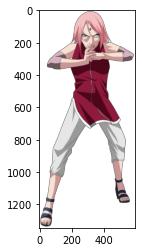

In [293]:
# displaying loaded 4 channel image using plt.imshow()
plt.imshow(example_image)

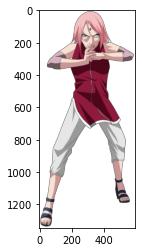

In [294]:
# Displaying 4 channel image converted in tensor
plt.imshow(tensor_example_image)

In [301]:
# Convert the 4 channel RGBA image to 3 channel RGB
import cv2
rgb_example_image = cv2.cvtColor(example_image, cv2.COLOR_RGBA2RGB)
rgb_example_image.shape

(1345, 593, 3)

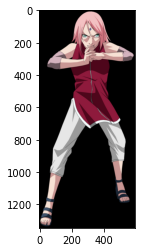

In [302]:
# displaying the 3 channel RGB image
plt.imshow(rgb_example_image)

In [304]:
# convert 3 channel image to tensors
tensor_rgb_example_image = tf.constant(rgb_example_image)
tensor_rgb_example_image.shape

TensorShape([1345, 593, 3])

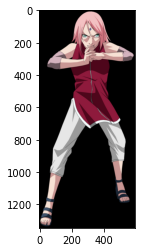

In [305]:
# Displaying 3 channel tensor image using plt.imshow
plt.imshow(tensor_rgb_example_image)

**DOUBT: Find the reason for the below.**  
Why is it that when I load in images using `matplotlib.pyplot.imread` the pixel values are between `(0,1)` but when I load imaged using `cv2.imread` the pixel values are between `(0,255)`?  
Which one should I use?  
  
SOLVED:  
Explicitly specify `format='PNG'` when using `matplotlib.pyplot.imread` to get pixel values between `(0,255)`  
`plt.imread('<file_path>.png', format='PNG')`

But why did this happen?

In [ ]:
plt_loaded_img = plt.imread('/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_selected_all_in_one/Sakura_Haruno (32).png')
print(plt_loaded_img.shape)
print(plt_loaded_img.min(), plt_loaded_img.max())

(1345, 593, 4)
0.0 1.0


In [ ]:
import cv2
cv2_loaded_img = cv2.imread('/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_selected_all_in_one/Sakura_Haruno (32).png')
print(cv2_loaded_img.shape)
print(cv2_loaded_img.min(), cv2_loaded_img.max())

(1345, 593, 3)
0 255


In [ ]:
# SOLVED
plt_loaded_img = plt.imread('/content/drive/MyDrive/Datasets/Naruto_Sasuke_Sakura_Dataset/pilot_selected_all_in_one/Sakura_Haruno (32).png', format='PNG')
print(plt_loaded_img.shape)
print(plt_loaded_img.min(), plt_loaded_img.max())

(1345, 593, 4)
0 255
